# Minimal CNN

Code for playing around with various architectures.

### Hyperparameters

In [1]:
max_doclen = 3
word_dim, vocab_size = 5, 10
nb_filter, filter_len = 50, 1
filter_lens = [1, 2, 3]

nb_class = 2

### Define Model

In [2]:
from keras.layers import Input, Embedding, Dense
from keras.layers import Convolution1D, MaxPooling1D, Flatten, merge
from keras.models import Model

input = Input(shape=[max_doclen], dtype='int32')

embedded = Embedding(output_dim=word_dim, input_dim=vocab_size, input_length=max_doclen, weights=None)(input)

activations = [0]*len(filter_lens)
for i, filter_len in enumerate(filter_lens):
    convolved = Convolution1D(nb_filter=nb_filter,
                              filter_length=filter_len,
                              activation='relu')(embedded)
    max_pooled = MaxPooling1D(pool_length=max_doclen-filter_len+1)(convolved) # max-1 pooling
    flattened = Flatten()(max_pooled)

    activations[i] = flattened
    
merged = merge(activations, mode='concat')

probs = Dense(nb_class, activation='softmax')(merged)

model = Model(input=input, output=probs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Using Theano backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3)             0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 3, 5)          50          input_1[0][0]                    
____________________________________________________________________________________________________
convolution1d_1 (Convolution1D)  (None, 3, 50)         300         embedding_1[0][0]                
____________________________________________________________________________________________________
convolution1d_2 (Convolution1D)  (None, 2, 50)         550         embedding_1[0][0]                
___________________________________________________________________________________________

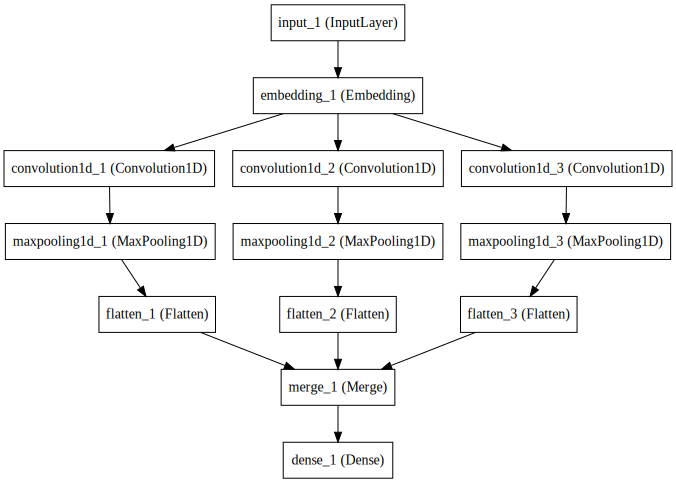

In [3]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Train Model

In [4]:
from keras.utils.np_utils import to_categorical

X, y = np.array([[1, 2, 4], [0, 3, 4]]), to_categorical([1, 0])

model.fit(X, y)

Epoch 1/10
2/2 [==============================] - 0s - loss: 0.6937 - acc: 0.5000
Epoch 2/10
2/2 [==============================] - 0s - loss: 0.6917 - acc: 0.5000
Epoch 3/10
2/2 [==============================] - 0s - loss: 0.6898 - acc: 1.0000
Epoch 4/10
2/2 [==============================] - 0s - loss: 0.6884 - acc: 1.0000
Epoch 5/10
2/2 [==============================] - 0s - loss: 0.6873 - acc: 1.0000
Epoch 6/10
2/2 [==============================] - 0s - loss: 0.6863 - acc: 1.0000
Epoch 7/10
2/2 [==============================] - 0s - loss: 0.6852 - acc: 1.0000
Epoch 8/10
2/2 [==============================] - 0s - loss: 0.6841 - acc: 1.0000
Epoch 9/10
2/2 [==============================] - 0s - loss: 0.6829 - acc: 1.0000
Epoch 10/10
2/2 [==============================] - 0s - loss: 0.6816 - acc: 1.0000
